# Calcula el error entre experimental y casos
* Compara los archivos procesados C_ae.csv, C_bm.csv, C_za.csv con Ti de experimento.csv


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse


In [11]:
exp = pd.read_csv('../mas20problemas/data/002_processed/experimento.csv',
                 index_col=0,
                 parse_dates=True)
# exp.index

In [9]:
# exp.columns

In [10]:
# exp.Ti.plot()

In [13]:
f = '../mas20problemas/data/002_processed/C_za.csv'
za = pd.read_csv(f,parse_dates=True,index_col=0)
# za.index

In [14]:
f = '../mas20problemas/data/002_processed/C_ae.csv'
ae = pd.read_csv(f,parse_dates=True,index_col=0)

In [15]:
f = '../mas20problemas/data/002_processed/C_bm.csv'
bm = pd.read_csv(f,parse_dates=True,index_col=0)

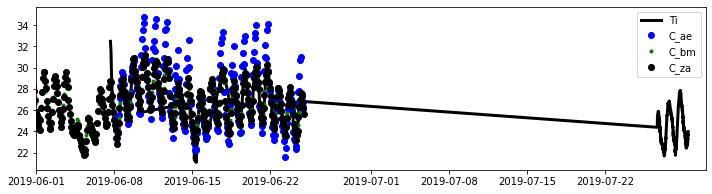

In [21]:
fig , ax = plt.subplots(figsize=(12,3))

fecha1 = parse('2019-06-01')
fecha2 = fecha1 + pd.Timedelta('60D')
ax.set_xlim(fecha1,fecha2)

ax.plot(exp.Ti,'k-',lw=3,label='Ti')

ax.plot(ae.Ti,'bo',label='C_ae',markevery=10)
ax.plot(bm.Ti,'g.',label='C_bm',markevery=10)
ax.plot(za.Ti,'ko',label='C_za',markevery=10)

ax.legend()

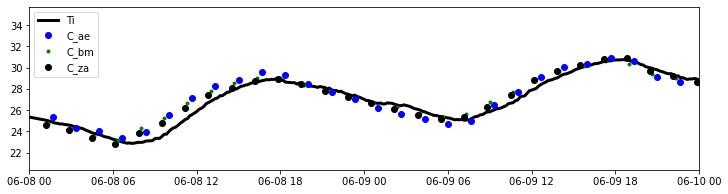

In [24]:
fig , ax = plt.subplots(figsize=(12,3))

fecha1 = parse('2019-06-08')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)

ax.plot(exp.Ti,'k-',lw=3,label='Ti')
 
ax.plot(ae.Ti,'bo',label='C_ae',markevery=10)
ax.plot(bm.Ti,'g.',label='C_bm',markevery=10)
ax.plot(za.Ti,'ko',label='C_za',markevery=10)

ax.legend()

In [41]:
exp_fechas = exp.loc[fecha1:fecha2]
za_fechas  =  za.loc[fecha1:fecha2]
ae_fechas  =  ae.loc[fecha1:fecha2]
bm_fechas  =  bm.loc[fecha1:fecha2]

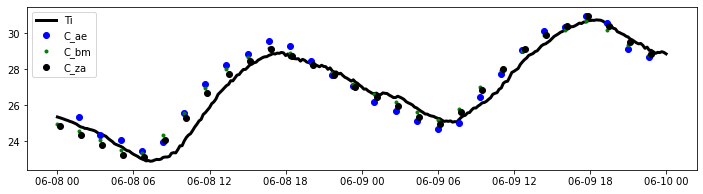

In [28]:
fig , ax = plt.subplots(figsize=(12,3))

# fecha1 = parse('2019-06-08')
# fecha2 = fecha1 + pd.Timedelta('2D')
# ax.set_xlim(fecha1,fecha2)

ax.plot(exp_fechas.Ti,'k-',lw=3,label='Ti')
 
ax.plot(ae_fechas.Ti,'bo',label='C_ae',markevery=10)
ax.plot(bm_fechas.Ti,'g.',label='C_bm',markevery=10)
ax.plot(za_fechas.Ti,'ko',label='C_za',markevery=10)

ax.legend()

In [30]:
exp_fechas.Ti  - ae_fechas.Ti

2019-06-08 00:00:00         NaN
2019-06-08 00:10:00   -0.675968
2019-06-08 00:20:00   -0.569363
2019-06-08 00:30:00   -0.491940
2019-06-08 00:40:00   -0.401006
                         ...   
2019-06-09 23:20:00    0.414367
2019-06-09 23:30:00    0.453181
2019-06-09 23:40:00    0.590239
2019-06-09 23:50:00    0.536448
2019-06-10 00:00:00    0.500426
Name: Ti, Length: 289, dtype: float64

<AxesSubplot:>

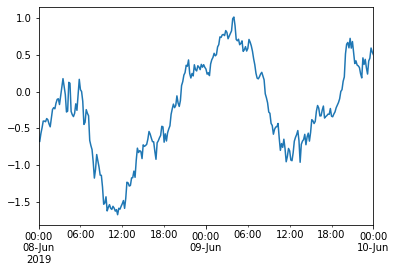

In [31]:
(exp_fechas.Ti  - ae_fechas.Ti).plot()

In [32]:
(exp_fechas.Ti  - ae_fechas.Ti).mean()

-0.24219756126850545

In [34]:
(abs(exp_fechas.Ti  - ae_fechas.Ti)).mean()

0.5683244299055318

In [35]:
(abs(exp_fechas.Ti  - bm_fechas.Ti)).mean()

0.462518923808127

In [36]:
(abs(exp_fechas.Ti  - za_fechas.Ti)).mean()

0.42683693784383053

In [42]:
za_fechas  = za_fechas.add_suffix('_za')
ae_fechas  =  ae_fechas.add_suffix('_ae')
bm_fechas  =  bm_fechas.add_suffix('_bm')
exp_fechas = exp_fechas.add_suffix('_exp')

In [44]:
todos = pd.concat([za_fechas.Ti_za,
                  ae_fechas.Ti_ae,
                  bm_fechas.Ti_bm,
                  exp_fechas.Ti_exp],axis=1)
todos

,Ti_za,Ti_ae,Ti_bm,Ti_exp
2019-06-08 00:00:00,NaN,NaN,24.947862,25.348056
2019-06-08 00:10:00,24.861074,25.987106,24.896703,25.311138
2019-06-08 00:20:00,24.819322,25.843582,24.883444,25.274220
2019-06-08 00:30:00,24.777858,25.720011,24.848257,25.228072
2019-06-08 00:40:00,24.712830,25.588698,24.807729,25.187692
...,...,...,...,...
2019-06-09 23:30:00,28.697008,28.480575,28.596118,28.933756
2019-06-09 23:40:00,28.641564,28.391972,28.560592,28.982211
2019-06-09 23:50:00,28.610465,28.400769,28.524514,28.937217
2019-06-09 23:59:59,28.562860,NaN,NaN,NaN


In [45]:
todos.to_csv('../mas20problemas/data/002_processed/todos.csv')